# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential

In [2]:
# Choose the file
SEQ_RESULT_FILE="results/sequential_10.csv"

In [3]:
seq = get_standardized_measures(SEQ_RESULT_FILE)

In [4]:
seq.describe()

,READ,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
count,5.000000e+00,5.00000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,1.186952e+09,67356.80000,6.818667e+08,8.874135e+08,5.810352e+06,2.762110e+09
std,7.099808e+06,169.61928,1.908894e+06,4.150249e+06,5.379181e+06,3.788608e+06
min,1.180029e+09,67105.00000,6.803745e+08,8.830799e+08,2.665819e+06,2.756416e+09
25%,1.181517e+09,67344.00000,6.810667e+08,8.834319e+08,3.550431e+06,2.761807e+09
50%,1.185317e+09,67357.00000,6.812947e+08,8.874542e+08,3.597378e+06,2.761883e+09
75%,1.190518e+09,67398.00000,6.813908e+08,8.914277e+08,3.838184e+06,2.763569e+09
max,1.197381e+09,67580.00000,6.852066e+08,8.916737e+08,1.539995e+07,2.766876e+09


In [5]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

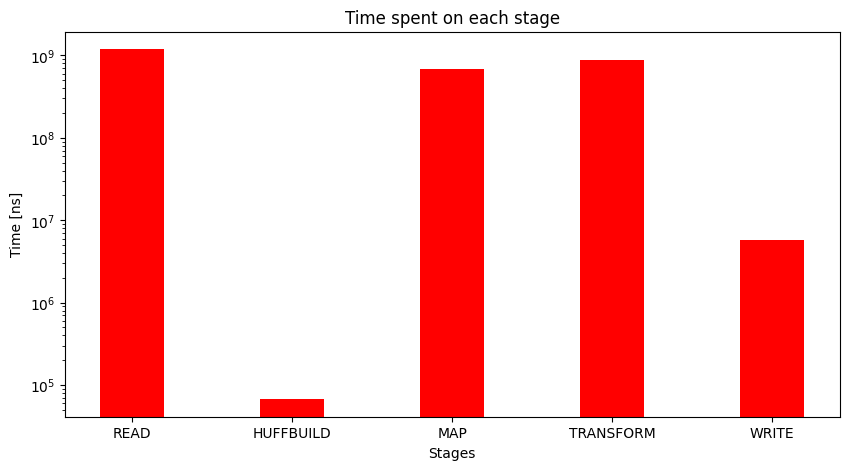

In [6]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [7]:
thr = get_standardized_measures('results/thr_10.csv', excluded_columns=['P_DEGREE'])

In [11]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [thr_data[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

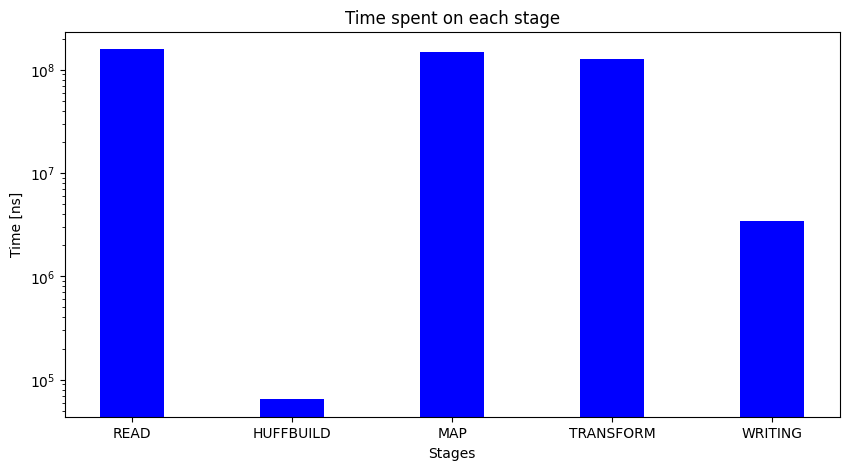

In [12]:
plot_for_p(11, thr)

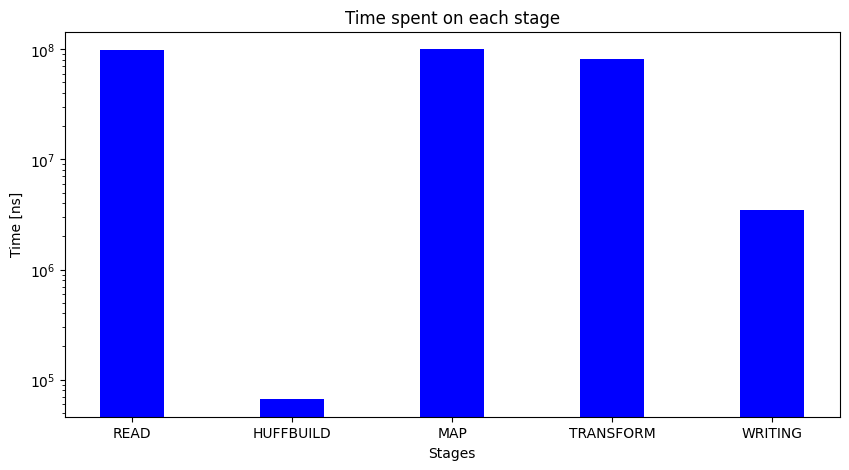

In [14]:
plot_for_p(18, thr)